# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

0.8869355507764365
0
0.0
0.09040683073832245


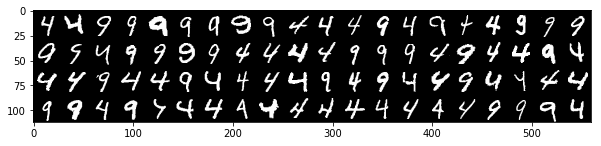

In [5]:
def getLinear(X, y, w):
#     print(X.shape, y.shape)
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    tmp = np.sign(np.matmul(X2.T, w).T)
    if(y.shape[1] != tmp.shape[1]):
        print(y.shape, tmp.shape)
    return np.sum(y != tmp) / X.shape[1]

show_digit(X)
# Do feature normalization here
# begin answer
Xstd = np.std(X, axis = 0)
Xmean = np.mean(X, axis = 0)
Xnor = (X - Xmean) / Xstd
# end answer

# Do LOOCV
# lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbdas = np.array([0])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.concatenate((Xnor[:,:j], Xnor[:,j + 1:]), axis = 1)  # take point j out of X
        y_ = np.concatenate((y[:,:j], y[:,j + 1:]), axis = 1)
        w = ridge(X_, y_, lmbdas[i])
        E_val = E_val + getLinear(Xnor[:,j:j+1], y[:,j:j+1], w)
    print(np.sum(w*w))
    # Update lmbda according validation error
    # begin answer
    if(E_val < E_val_min):
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer   
# Compute training error
print(lmbda)
w = ridge(Xnor, y, lmbda)
Etrain = getLinear(Xnor, y, w)
print(Etrain)
# Do feature normalization to X_test, y_test
X_test_std = np.std(X_test, axis = 0)
X_test_mean = np.mean(X_test, axis = 0)
X_test_nor = (X_test - X_test_mean) / X_test_std
Etrain = getLinear(X_test_nor, y_test, w)
print(Etrain)
# Compute test error

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [17]:
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
# lmbdas = np.array([100])
from logistic_r import logistic_r
Xstd = np.std(X, axis = 0)
Xmean = np.mean(X, axis = 0)
Xnor = (X - Xmean) / Xstd
def getLogistic(X, y, w):
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    y = np.intc(y == 1) 
    tmp = np.intc((1 / (1 + np.exp(-np.matmul(X2.T, w).T))) >= 0.5)
    return np.sum(y != tmp )/ X.shape[1]

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.concatenate((Xnor[:,:j], Xnor[:,j + 1:]), axis = 1)  # take point j out of X
        y_ = np.concatenate((y[:,:j], y[:,j + 1:]), axis = 1)
        w = logistic_r(X_, y_, lmbdas[i])
        E_val = E_val + getLogistic(Xnor[:,j:j+1], y[:,j:j+1], w)
    if(E_val < E_val_min):
        E_val_min = E_val
        lmbda = lmbdas[i]
        
    
# Compute training error
print(lmbda)
w = logistic_r(Xnor, y, lmbda)
Etrain = getLogistic(X, y, w)
print(Etrain)
X_test_std = np.std(X_test, axis = 0)
X_test_mean = np.mean(X_test, axis = 0)
X_test_nor = (X_test - X_test_mean) / X_test_std
Etrain = getLogistic(X_test_nor, y_test, w)
print(Etrain)
# Compute test error

/Users/basasuya/Desktop/CD_ML_assigments/assignment2/ml2018winter_hw2/regularization-cross-validation/logistic_r.py:23: RuntimeWarning: overflow encountered in exp
  error = np.sum(y != tmp)
/Users/basasuya/Desktop/CD_ML_assigments/assignment2/ml2018winter_hw2/regularization-cross-validation/logistic_r.py:22: RuntimeWarning: overflow encountered in exp
  tmp = np.intc((1 / (1 + np.exp(-np.matmul(X2.T, w).T))) >= 0.5)
/Users/basasuya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/basasuya/Desktop/CD_ML_assigments/assignment2/ml2018winter_hw2/regularization-cross-validation/logistic_r.py:23: RuntimeWarning: invalid value encountered in greater_equal
  error = np.sum(y != tmp)
/Users/basasuya/Desktop/CD_ML_assigments/assignment2/ml2018winter_hw2/regularization-cross-validation/logistic_r.py:22: RuntimeWarning: overflow encountered in multiply
  tmp = np.intc((1 / (1 + 

0.001
0.0
0.0622802611752888
